In [2]:
import pandas as pd
dmnd_df = pd.read_pickle("/home/hermuba/data0118/ecoli70_dmnd_df")

In [4]:
dmnd_df.shape # all of them

(30745, 7)

awk '/^>/{a++}END{print a}' Escherichia0.70
31749

pangenome size = 31749

In [9]:
len(dmnd_df['qseqid'].unique()) # they are not unique

30740

In [21]:
dmnd_df.loc[dmnd_df.duplicated(subset = 'qseqid'), keep='last']

SyntaxError: invalid syntax (<ipython-input-21-a7b82ee2c0ab>, line 1)

In [5]:
dmnd_df.head()

,qseqid,sseqid,evalue,bitscore,staxids,stitle,sseq
0,JMUY01000001_1|1438670.3,ERO89779.1,2.900000e-13,82.8,562;1269001;1328433;1328435;1438668;1438670;14...,ERO89779.1 hypothetical protein L411_01206 [Es...,MVLAIFQLVPKMSMHLHSDKQVILLMVIHPLDGIGIVVHITP
1,JMUY01000001_3|1438670.3,WP_000972134.1,1.900000e-95,357.8,543;562;573;299766;941280;941322;1033813;11826...,WP_000972134.1 MULTISPECIES: tail fiber assemb...,MMHLKNITAGNPKTKEQYQLTKQFNIKWLYSADGKNWYEEQKNFQP...
2,JMUY01000001_5|1438670.3,WP_032140708.1,0.000000e+00,1243.8,562;941280;1328433;1438668;1438670;1438671;143...,WP_032140708.1 phage tail protein [Escherichia...,MSTTTRKFKTVITDTGAKKLAQAAAPDGKPVRLTHMAVGDGGGTLP...
3,JMUY01000001_8|1438670.3,WP_000213444.1,3.600000e-58,233.4,543;562;573;165302;656403;656447;670897;868133...,WP_000213444.1 MULTISPECIES: baseplate assembl...,MTTRYTGMNPDGTGNLNDMEHLKQSVRDILITPLASRVMRREYGSL...
4,JMUY01000001_10|1438670.3,EHX98065.1,5.900000e-115,422.9,562;868206;868209;868210;941280;941322;1182656...,EHX98065.1 phage virion morphogenesis protein ...,MKAMDKAFTRVDETFEAIRDSLNQQAINNIARKLAQDLRRAQQARI...


# We want to know 'staxid'.
- purpose: to find the target genomes sets for hypothetical gene inference by co-inheritance
- steps:
1. find out hypothetical
2. join their staxid

In [7]:
hypo = dmnd_df.loc[dmnd_df['stitle'].str.contains('hypothetical') | dmnd_df['stitle'].str.contains('ncharacter') | dmnd_df['stitle'].str.contains('unknown')]
hypo.shape

(14242, 7)

In [22]:
hypo.head()

,qseqid,sseqid,evalue,bitscore,staxids,stitle,sseq
0,JMUY01000001_1|1438670.3,ERO89779.1,2.900000e-13,82.8,562;1269001;1328433;1328435;1438668;1438670;14...,ERO89779.1 hypothetical protein L411_01206 [Es...,MVLAIFQLVPKMSMHLHSDKQVILLMVIHPLDGIGIVVHITP
11,JMUY01000001_23|1438670.3,WP_000236495.1,8.000000e-94,352.4,543;562;573;595;28901;299766;868155;868159;869...,WP_000236495.1 MULTISPECIES: hypothetical prot...,MVINYKQLREKREQVKESFRRNEDLTPLVRLAQGIVDAYEISLELP...
13,JMUY01000001_25|1438670.3,WP_000193205.1,8.200000e-149,535.8,543;562;573;90370;868194;869679;941280;941322;...,WP_000193205.1 MULTISPECIES: hypothetical prot...,MTQNPFSFYDFLGYLIPGGLFLFILFLFSIEINPVYIEGILNHILK...
16,JMUY01000001_29|1438670.3,WP_022645046.1,3.600000e-61,243.4,562;1328433;1328435;1328446;1328447;1438668;14...,WP_022645046.1 hypothetical protein [Escherich...,MILANDFLEYLLNTERDLAARVRDLYDMYLKSLPVPQLADGKIVID...
17,JMUY01000001_30|1438670.3,WP_000013455.1,2.500000e-31,143.7,543;562;573;299766;670890;868191;868194;869679...,WP_000013455.1 MULTISPECIES: hypothetical prot...,MANRKQHRAIAERRHIQTEINRRLSRASRVAQIMHINMLHERSHAL...


In [24]:
hypo.loc[hypo['stitle'].str.contains('MULTISPECIES')]

,qseqid,sseqid,evalue,bitscore,staxids,stitle,sseq
11,JMUY01000001_23|1438670.3,WP_000236495.1,8.000000e-94,352.4,543;562;573;595;28901;299766;868155;868159;869...,WP_000236495.1 MULTISPECIES: hypothetical prot...,MVINYKQLREKREQVKESFRRNEDLTPLVRLAQGIVDAYEISLELP...
13,JMUY01000001_25|1438670.3,WP_000193205.1,8.200000e-149,535.8,543;562;573;90370;868194;869679;941280;941322;...,WP_000193205.1 MULTISPECIES: hypothetical prot...,MTQNPFSFYDFLGYLIPGGLFLFILFLFSIEINPVYIEGILNHILK...
17,JMUY01000001_30|1438670.3,WP_000013455.1,2.500000e-31,143.7,543;562;573;299766;670890;868191;868194;869679...,WP_000013455.1 MULTISPECIES: hypothetical prot...,MANRKQHRAIAERRHIQTEINRRLSRASRVAQIMHINMLHERSHAL...
18,JMUY01000001_34|1438670.3,WP_000543036.1,1.200000e-65,258.5,543;562;573;299766;868191;868193;868195;869679...,WP_000543036.1 MULTISPECIES: hypothetical prot...,MHAKEEGIIRALKEISKTENEVAKKAIANNHMDVATHTLIVARVTA...
19,JMUY01000001_39|1438670.3,WP_001287828.1,4.400000e-26,125.9,543;562;573;656395;749549;868161;869679;941280...,WP_001287828.1 MULTISPECIES: hypothetical prot...,MSEDKKVVNLLSELSAALDNINPPRVKTTGDKDALNTEIHILLALV...
20,JMUY01000001_40|1438670.3,WP_000856387.1,3.700000e-73,283.5,543;562;573;299766;941322;1001989;1033813;1169...,WP_000856387.1 MULTISPECIES: hypothetical prot...,MKTNTSDFTITISKNDQALIDNLKYLAEKHNNGRIAINLRHITGVT...
23,JMUY01000001_45|1438670.3,WP_000488106.1,1.300000e-44,188.0,543;545;562;573;624;28901;54388;90370;90371;36...,WP_000488106.1 MULTISPECIES: hypothetical prot...,MFRCPLCGASARIRTSRPENDSNTVRQKYYQCNNLECGVCFSTLEA...
35,JMUY01000001_74|1438670.3,WP_000458387.1,1.600000e-142,515.0,543;550;562;571;573;149539;656394;656411;94128...,WP_000458387.1 MULTISPECIES: hypothetical prot...,MFAVLGDIEFELITYWDGFEATFGVDYAEHARIGGKPGLQFVGDRL...
37,JMUY01000001_77|1438670.3,WP_000110114.1,6.500000e-50,205.7,543;548;550;562;571;573;149539;439184;655817;6...,WP_000110114.1 MULTISPECIES: hypothetical prot...,MSVELTDKGGRCAALGMSNGTWFTLLDIPGVETLFNTRKTNDPIDC...
39,JMUY01000001_81|1438670.3,WP_001101804.1,1.200000e-82,315.1,543;548;550;562;571;573;90370;98360;149539;209...,WP_001101804.1 MULTISPECIES: hypothetical prot...,MNVLPVLDAVLARLREKLPQLQVEYFPEKPAEYRLNHPVGALLLSY...


In [36]:
def parse_taxis(string):
    return(string.split(';'))
def extract_taxid_set(df):
    ultimate_set = pd.Series()
    for i in df.index:
        if type(df.loc[i, 'staxids']) == str:
            taxid_set = parse_taxis(df.loc[i, 'staxids'])
            for tax in taxid_set:
                if tax in ultimate_set.index:
                    ultimate_set[tax] = ultimate_set[tax] + 1
                else:
                    ultimate_set[tax] = 1
    return(ultimate_set)

In [51]:
s= extract_taxid_set(hypo)

In [41]:
s.sort_values(ascending = False)

562        10609
543         3053
573         2138
624         1677
550         1174
72407        901
571          818
546          703
28901        656
561          554
90371        547
59201        529
621          528
91347        527
301102       436
1463165      433
299766       417
548          410
90370        368
158836       355
208224       354
1328435      344
1328433      343
623          340
1438670      338
1438668      337
1438672      331
1328446      330
1328447      330
941322       316
           ...  
1183155        1
575564         1
558688         1
106648         1
2033511        1
1813773        1
1934252        1
1454644        1
1454640        1
1454630        1
204042         1
1242093        1
81409          1
477184         1
1324339        1
1324340        1
120164         1
1446701        1
1387331        1
569            1
1387345        1
1387333        1
488142         1
296            1
1387339        1
108980         1
707232         1
981327        

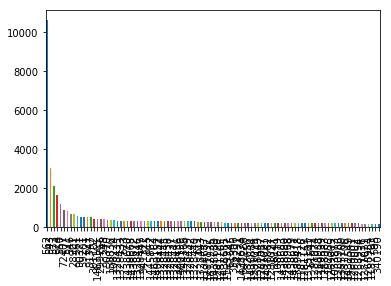

In [44]:
%matplotlib inline
s.sort_values(ascending = False)[:100].plot(kind = 'bar')

In [47]:
s.sort_values(ascending = False).index

Index(['562', '543', '573', '624', '550', '72407', '571', '546', '28901',
       '561',
       ...
       '1387345', '1387333', '488142', '296', '1387339', '108980', '707232',
       '981327', '1217669', '1219359'],
      dtype='object', length=4640)

code 	taxid 	taxname 	lineage
1 	562 	Escherichia coli 	562 561 543 91347 1236 1224 2 131567
1 	543 	Enterobacteriaceae 	543 91347 1236 1224 2 131567
1 	573 	Klebsiella pneumoniae 	573 570 543 91347 1236 1224 2 131567
1 	624 	Shigella sonnei 	624 620 543 91347 1236 1224 2 131567
1 	550 	Enterobacter cloacae 	550 354276 547 543 91347 1236 1224 2 131567
1 	72407 	Klebsiella pneumoniae subsp. pneumoniae 	72407 573 570 543 91347 1236 1224 2 131567
1 	571 	Klebsiella oxytoca 	571 570 543 91347 1236 1224 2 131567
1 	546 	Citrobacter freundii 	546 1344959 544 543 91347 1236 1224 2 131567
1 	28901 	Salmonella enterica 	28901 590 543 91347 1236 1224 2 131567
1 	561 	Escherichia 	561 543 91347 1236 1224 2 131567 

In [52]:
with open("/home/hermuba/data0118/hypothetical_dmnd_hit_taxa", 'a') as f:
    for i in s.sort_values(ascending = False).index:
        f.write(i+'\n')

We have a lot of Enterobacteriae, Acinetobacter in our hypothetical....
refer to ~data0118/taxa_report.txt for full report

+886-2-27361661 #3152
Associate Professor/Deputy Chair
Jui-Yu Wu
jwu@tmu.edu.tw
Department of Biochemistry and Molecular Cell Biology

Deputy Chair, School of Medicine




+886-2-66382736 #1511
Professor
Chiu, Hung-Wen
hwchiu@tmu.edu.tw
Graduate Institute of Biomedical Informatics 

 +886-2-66382736 #1505
 
 
 Thank you for spending your time helping me with the grad school application an all the support throughout the process. It's a pleasure learning from you and I enjoy all the discussions!  I will keep you updated about my progress. Thanks again for your assistance!! Student Hsuan-lin Her